In [5]:
# This example demonstrates the problems of underfitting and overfitting 

# Bias and variance are inherent properties of estimators and 
# we usually have to select learning algorithms and hyperparameters so that both bias and variance are as low as possible. 
# Another way to reduce the variance of a model is to use more training data. 
# However, you should only collect more training data if the true function is too complex to be approximated by an estimator with a lower variance.

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

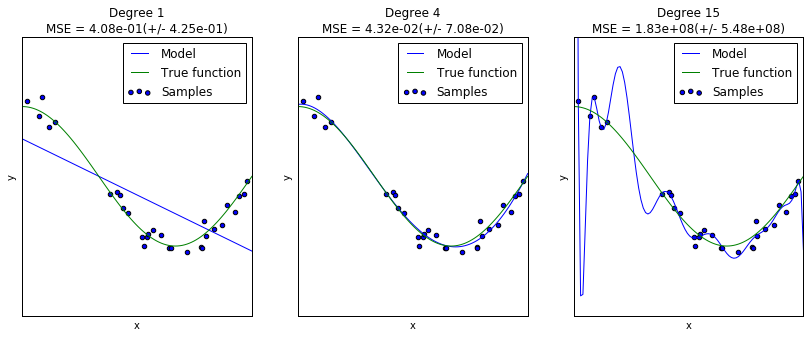

In [6]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
# The plot shows the function that we want to approximate, which is a part of the cosine function. 
# In addition, the samples from the real function and the approximations of different models are displayed. 
# The models have polynomial features of different degrees. 
# We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. 
# This is called underfitting. 
# A polynomial of degree 4 approximates the true function almost perfectly. 
# However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. 
# We evaluate quantitatively overfitting / underfitting by using cross-validation. 
# We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#example-model-selection-plot-underfitting-overfitting-py

In [1]:
## Validation Curves

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

# load dataset
digits = load_digits()
X, y = digits.data, digits.target

In [2]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

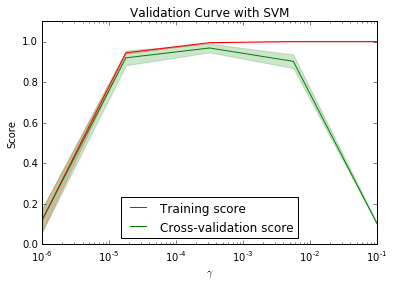

In [4]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [ ]:
# In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. 
# For very low values of gamma, you can see that both the training score and the validation score are low. 
# This is called underfitting. 
# Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. 
# If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.

# http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html